# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html)

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
col_names = table.find('tr').text.strip()
rows = table.find_all('tr', class_='data-row')

In [6]:
col_list = col_names.replace("\n", ",")
columns = col_list.split(",")
columns

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [26]:
# Create an empty list
table_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    table_list.append(row_data)


In [8]:
# Create Pandas DataFrame

mars_df = pd.DataFrame(table_list, columns=columns)

In [9]:
# Confirm DataFrame was created successfully

mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)


In [12]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
mars_df.nunique()

id                  1867
terrestrial_date    1867
sol                 1867
ls                   360
month                 12
min_temp              29
pressure             199
dtype: int64

In [14]:
# 1. How many months are there on Mars?
month_count = mars_df['month'].nunique()
print(f"There are {month_count} months on Mars.")

There are 12 months on Mars.


In [15]:
# 2. How many sols (Martian days) worth of data are there?
sol_count = mars_df['sol'].nunique()
print(f"There are {sol_count} sols('Martian Days') worth of data.")

There are 1867 sols('Martian Days') worth of data.


In [16]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
avg_min_df = pd.DataFrame(avg_min_temp)
avg_min_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


<Figure size 640x480 with 0 Axes>

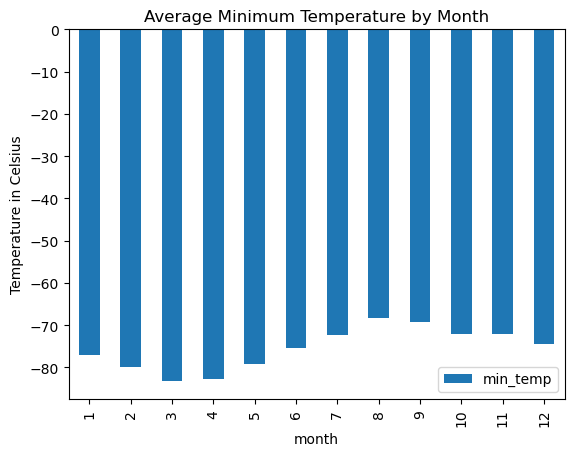

In [17]:
# Plot the average minimum temperature by month
plt.figure()
avg_min_df.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.ylabel('Temperature in Celsius')
plt.xlabel('month')
plt.show()

<Figure size 640x480 with 0 Axes>

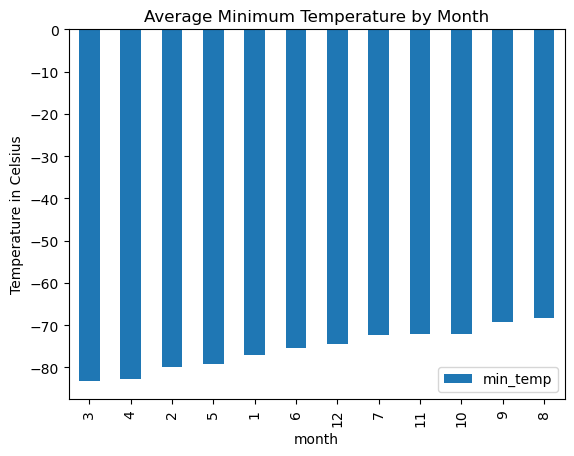

In [18]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_sort = avg_min_df.sort_values(by='min_temp')
plt.figure()
avg_min_sort.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.ylabel('Temperature in Celsius')
plt.xlabel('month')
plt.show()

In [19]:
# 4. What is the average pressure by month?
avg_min_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure_df = pd.DataFrame(avg_min_pressure)
avg_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


<Figure size 640x480 with 0 Axes>

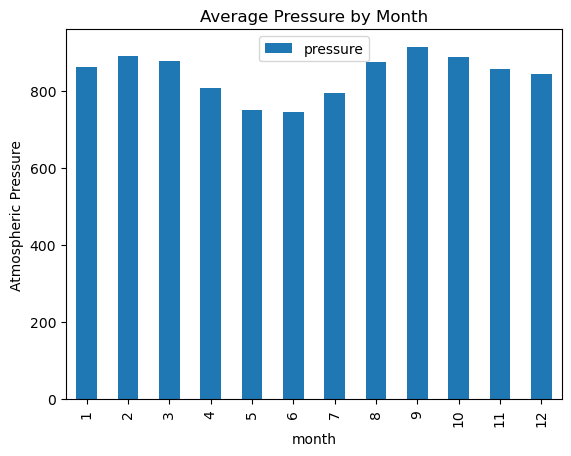

In [20]:
# Plot the average pressure by month
plt.figure()
avg_pressure_df.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.ylabel('Atmospheric Pressure')
plt.xlabel('month')
plt.show()

<Figure size 640x480 with 0 Axes>

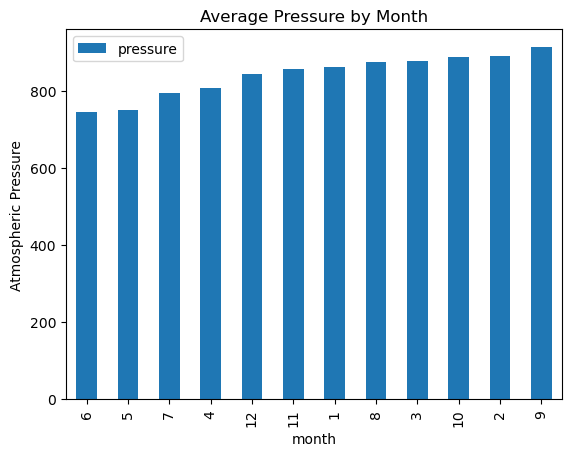

In [21]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_sort = avg_pressure_df.sort_values(by='pressure')
plt.figure()
avg_pressure_sort.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.ylabel('Atmospheric Pressure')
plt.xlabel('month')
plt.show()

In [22]:
start_date = mars_df['terrestrial_date'][0]
earth_year = start_date + timedelta(days=364)
print(start_date)
print(earth_year)


2012-08-16 00:00:00
2013-08-15 00:00:00


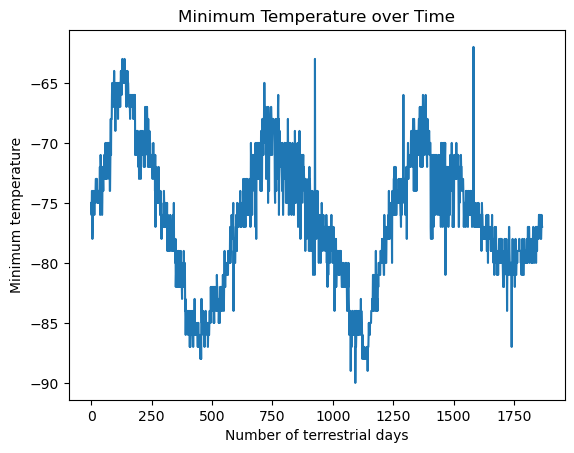

In [23]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
#earth_day_count = mars_df['terrestrial_date'].count()
each_min_temp = mars_df['min_temp']
plt.figure()
each_min_temp.plot(kind='line')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.title('Minimum Temperature over Time')
plt.show()


#### Minimum Temperature    

- A year on Mars is split into 12 months, though the timeframe is different than on Earth. 
- In this dataset there are 1867 sols, or Martian days, worth of data.
- The warmest month on Mars is the 8th month with an average temperature of -68.4 degrees Celsious. The coldest month is the 3rd month with an average of -83.3 degrees Celsious. This can be seen in the bar plots of the dataframes named 'avg_min_df' and 'avg_min_sort'.

#### Atmospheric Pressure

- The average daily atmospheric pressure is lowest in the 6th month at 745.0 bars and highest in the 9th month at 913.3 bars. The bar plots for the dataframes named 'avg_pressure' and avg_pressure_sort' illustrate this.

#### Year Length

- A line plot was made to visualize the 'min_temp' for the entire dataset. Based on the repeating pattern in the plot I estimate that it takes approximately 700 Earth days for Mars to circle the sun.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
file_path = '../Results/mars_weather_text.csv'

mars_df.to_csv(file_path, index=False)

In [25]:
browser.quit()